1. Import Libraries

In [2]:
#for loading the dataset and preprocessing
import pandas as pd
import spacy
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('stopwords')
#for visualisation
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#for vectorizing the text
from sklearn.feature_extraction.text import TfidfVectorizer
#for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#for evaluvation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Load and Explore the Data:

In [3]:

#loading the dataset
data=pd.read_csv("spam.csv",encoding='latin-1')
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN 

In [4]:
data.shape

(5572, 5)

3.dropping the unwanted columns

In [5]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


4.visualising the number of spam and ham text

<Axes: xlabel='v1', ylabel='count'>

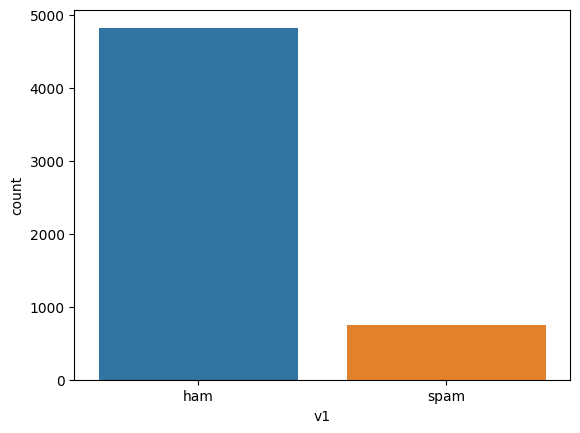

In [7]:
sns.countplot(x="v1",data=data)

In [8]:
#downsampling as the number of ham is greater than spam
ham=data[data.v1=="ham"]
spam=data[data.v1=="spam"]
ham=ham.sample(n=len(spam),random_state=1)
#creating new dataset
df=pd.concat([ham,spam],axis=0).reset_index(drop=True)


<Axes: xlabel='v1', ylabel='count'>

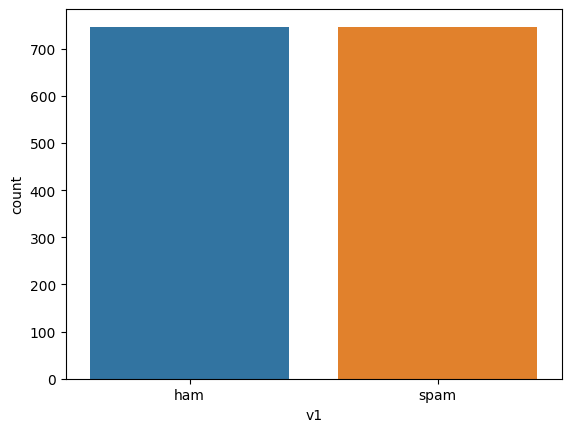

In [9]:
#visualising the count after downsampling
sns.countplot(x="v1",data=df)

5.PREPROCESSING


In [10]:
def preprocessing(df):
    stop_words=set(stopwords.words('english'))
    for i in range(len(df)):
        words=nltk.word_tokenize(df["v2"][i])
        cleaned_words=[word for word in words if word.isalnum() if word not in stop_words]
        df.at[i, "v2"] = ' '.join(cleaned_words)

preprocessing(df)

6.VISUALIZING THE MOST FREQUENT WORDS IN SPAM AND HAM TEXT

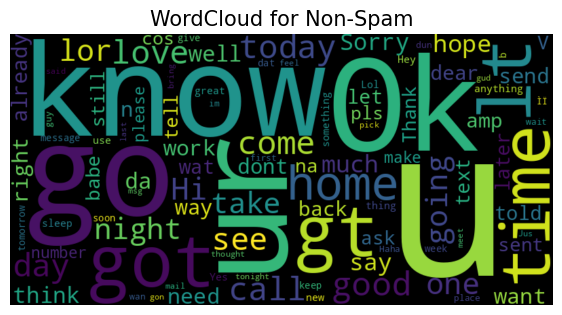

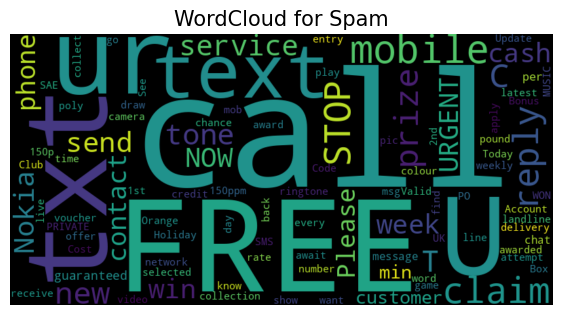

In [11]:
def wordclouds(df,type):
    text=" ".join(df["v2"])
    plt.figure(figsize=(7,7))
    wc = WordCloud(background_color='black',max_words=100,width=800,height=400,collocations=False).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {type}', fontsize=15)
    plt.axis('off')
    plt.show()
wordclouds(df[df['v1']=="ham"], type='Non-Spam')
wordclouds(df[df['v1']=="spam"], type='Spam')

7.ENCODING

In [12]:
#converting categorical values in v1
Spam=pd.get_dummies(df['v1'],drop_first=True)
#here '0' represents ham and '1' represenrs spam
df=pd.concat([df,Spam],axis=1)
df.drop("v1",axis=1,inplace=True)
df.head()


,v2,spam
0,Can pls pls send mail know relatives coming de...,0
1,Yeah probably sure Ilol let u know personally ...,0
2,Were gon na go get tacos,0
3,Hi Hope good day Have better night,0
4,How much r willing pay,0


8.VECTORIZATION

In [13]:
#splittin the data and vectorizing the text using tf-idf
x_train,x_test,y_train,y_test=train_test_split(df['v2'],df['spam'],test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(max_features=1000,stop_words='english')
x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

9.TRAINING THE MODEL

In [14]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train_tfidf,y_train)
y_pred = classifier.predict(x_test_tfidf)

10.EVALUVATION

accuracy:  0.93
Confusion Matrix


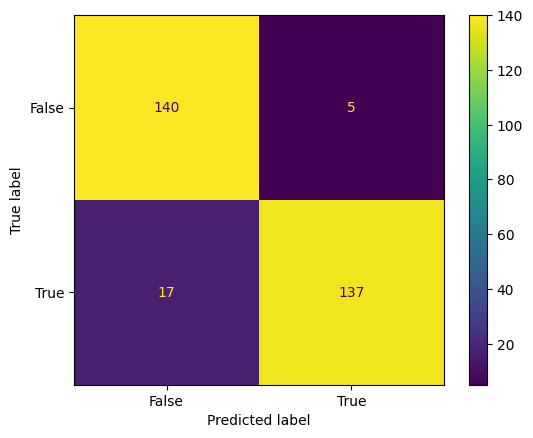

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       145
           1       0.96      0.89      0.93       154

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



In [15]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy: ",round(accuracy,2))
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
plot=ConfusionMatrixDisplay(matrix,display_labels=[False,True])
plot.plot()
plt.show()
report=classification_report(y_test,y_pred)
print("Classification Report")
print(report)